In [ ]:
import os
import numpy
import random
from PIL import Image, ImageEnhance
from tensorflow.keras.models import Sequential
from tensorflow. keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam
from tensorflow. keras. applications import VGG16
from sklearn.utils import shuffle


In [ ]:
#training data

training_data='/content/drive/MyDrive/BrainTumor_Dataset/Training'

#testing data

testing_data='/content/drive/MyDrive/BrainTumor_Dataset/Testing'

Data Preparation (for both train and test data) :

1.Spliting labels and feature(image here)

2.Shuffeling the data

In [ ]:
#load and shuffle train data

train_path=[]
train_label=[]


for tr_labels in os.listdir(training_data):            #list all the directories in the specified path
  for tr_images in os.listdir(os.path.join(training_data,tr_labels)):
   train_path.append(os.path.join(training_data, tr_labels, tr_images))        #add the image paths in list train_path
   train_label.append(tr_labels)          #add the labels off the images in the list train_label
print("\n","Pre Shuffle in training data ")
print(train_path)
print(train_label)

# shuffle to avoid overfitting in the model
train_path, train_label= shuffle(train_path, train_label, random_state=42)
print("\n", "Post Shuffle in training data ")
print(train_path)
print(train_label)

print("\n")


#load and shuffle test data

test_path=[]
test_label=[]


for te_labels in os.listdir(testing_data):            #list all the directories in the specified path
  for te_images in os.listdir(os.path.join(testing_data,te_labels)):
   test_path.append(os.path.join(testing_data, te_labels, te_images))        #add the image paths in list train_path
   test_label.append(te_labels)          #add the labels off the images in the list train_label
print("\n","Pre Shuffle in testing data ")
print(test_path)
print(test_label)


# shuffle to avoid overfitting in the model
test_path, test_label= shuffle(test_path, test_label)
print("\n","Post Shuffle in testing data ")
print(test_path)
print(test_label)





 Pre Shuffle in training data 
['/content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0329.jpg', '/content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0330.jpg', '/content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0318.jpg', '/content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0339.jpg', '/content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0347.jpg', '/content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0349.jpg', '/content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0360.jpg', '/content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0336.jpg', '/content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0340.jpg', '/content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0354.jpg', '/content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0343.jpg', '/content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0346.jpg', '/content/drive/MyDrive/BrainTumor_Dataset/Training/gli

Data Visualization

[3947, 2003, 2690, 1253, 7, 41, 4359, 3544, 5159, 877]
0 3947
0 3947 /content/drive/MyDrive/BrainTumor_Dataset/Training/notumor/Tr-no_0191.jpg
1 2003
1 2003 /content/drive/MyDrive/BrainTumor_Dataset/Training/meningioma/Tr-me_1180.jpg
2 2690
2 2690 /content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_0740.jpg
3 1253
3 1253 /content/drive/MyDrive/BrainTumor_Dataset/Training/notumor/Tr-no_0824.jpg
4 7
4 7 /content/drive/MyDrive/BrainTumor_Dataset/Training/meningioma/Tr-me_0517.jpg
5 41
5 41 /content/drive/MyDrive/BrainTumor_Dataset/Training/glioma/Tr-gl_1240.jpg
6 4359
6 4359 /content/drive/MyDrive/BrainTumor_Dataset/Training/notumor/Tr-no_0907.jpg
7 3544
7 3544 /content/drive/MyDrive/BrainTumor_Dataset/Training/pituitary/Tr-pi_0652.jpg
8 5159
8 5159 /content/drive/MyDrive/BrainTumor_Dataset/Training/notumor/Tr-no_0639.jpg
9 877
9 877 /content/drive/MyDrive/BrainTumor_Dataset/Training/pituitary/Tr-pi_0732.jpg


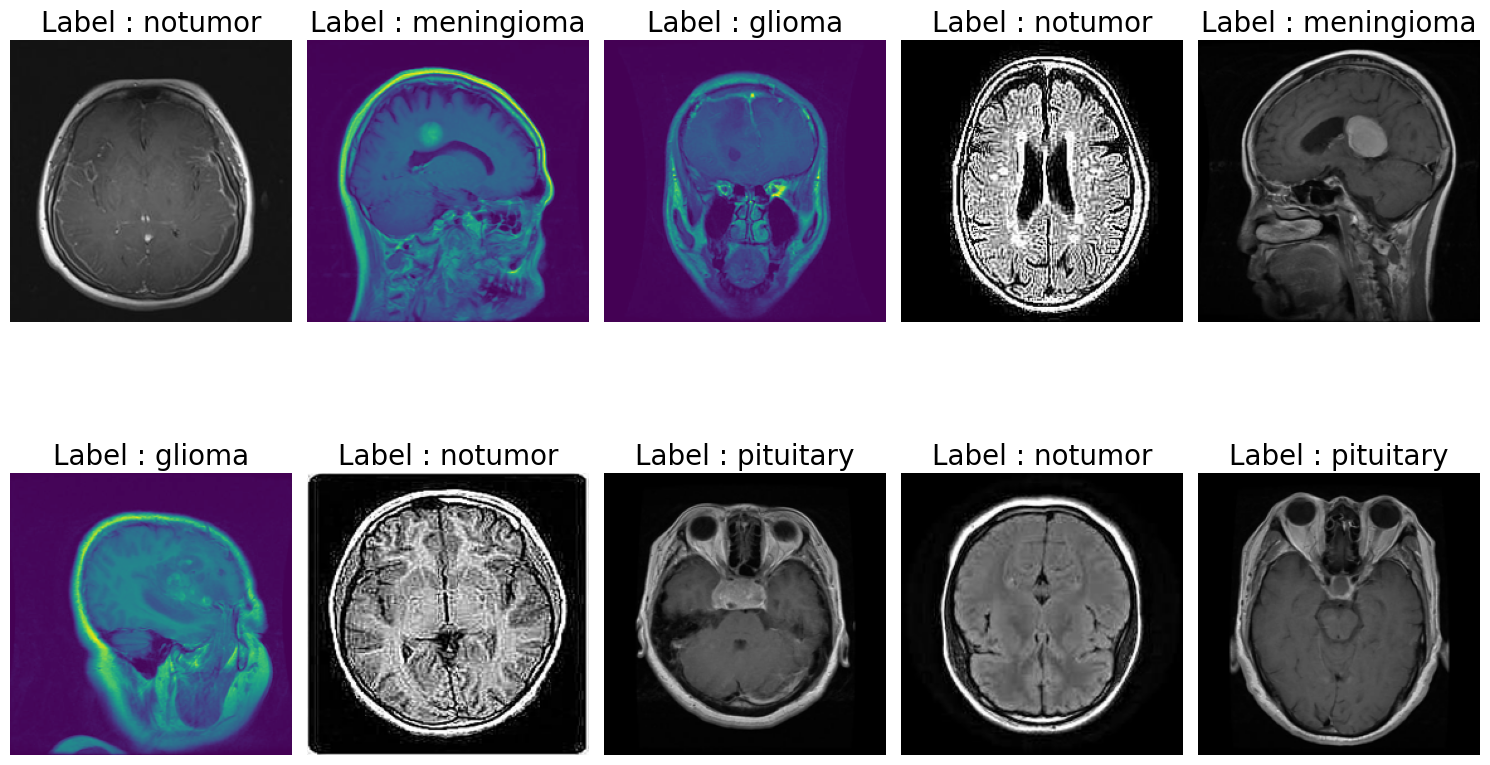

In [ ]:
import matplotlib.pyplot as plt

#select 10 random images
images=random.sample(population=range(len(train_path)), k= 10)
print(images)  #o/p are randomly chosen numbers

#to display the selected images in 2 rows, 5 columns

fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.ravel()

for i, idx in enumerate(images):
  print(i, idx)
  img_path=train_path[idx]
  print(i, idx, img_path)
  img=Image.open(img_path)
  img=img.resize((224,224))
  axes[i].imshow(img)
  axes[i].set_title(f"Label : {train_label[idx]}", fontsize=20)
  axes[i].axis('off')
plt.tight_layout()
plt.show()

Image Preprocessing



In [ ]:
import numpy as np
#Image Augmentation
def augment_image(image):
  image = Image.fromarray(np.uint8(image))  #converting the image into array format where each pixel value is between 0 and 255. Then converting it to image of Pillow.
  image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))   #if my Pillow image has brightness >1 then reduce its brightness by 80%,
                                                                            #if my Pillow image has brightness <1 then increase its brightness by 120%
                                                                            #At each run the image brightness is adjusted by any value b/w (0.8 and 1.20).
  image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.20))
  image = np.array(image)/255.0        #normalizing the original pixel values which are b/w 0 and 255 to any value between 0 and 1.
                                       #Normalization helps the computer "see" all images in a similar way, making it easier and faster for deep learning models to learn and make accurate predictions.
  return image

#Load images and apply augmentation
"""def open_images(paths):
  images= []         #creating new empty list which will later carry the augmented Pillow Images
  for path in paths:
    img=load_img(path, target_size = (224, 224))
    img=augment_image(img)
    images.append(img)
  return np.array(images)"""

def open_images(paths, augment=False):
    images = []
    for path in paths:
        img = load_img(path, target_size=(224, 224))
        img = np.array(img)
        if augment:
            img = augment_image(img)
        img = img / 255.0  # Normalize
        images.append(img)
    return np.array(images)



#encoding the labels
def encode_label(labels):
  unique_labels = sorted(os.listdir(training_data))

  #unique_labels=os.listdir(training_data)
  encoded = [unique_labels.index(label) for label in labels]
  return np.array(encoded)


#supply data in batches to model. Hence generate data in batches.
def data_gen(paths, labels, batch_size=12, epochs=1):
  for i in range(epochs):
    for j in range(0, len(paths), batch_size):
      batch_paths=paths[i:i+batch_size]
      batch_images=open_images(batch_paths, True)
      batch_labels=labels[i:i+batch_size]
      batch_labels=encode_label(batch_labels)
      yield batch_images, batch_labels



#Model Architecture:
#Tranfer Learning :

**Core idea**:

No need to built model\learning form stratch. Just adapt to the new objective by building on top of it.

Using a pretrained model and leaverage the models knowledge to achieve your objective.

**Adv:**

1. saves time in building\training model.
2. cuts the cost in terms of time, effort spent, resouces in training.
3. you no longer need a huge labelled dataset for training.
4. better results observed than stracth model

**Architecture:**


Multiple CNN layers (CNN base)-> they learn the spatial information\feature extraction about the image


Multiple dense layers (with 'n' no. of neurons) + 1 o\p layer (no. of nurons here depends on the no. of classes) -> for learning the classification and classifying the images.


# How to apply tranfer learning:


1. Fine tuning:

Used when your dataset is diffirent from the dataset on which the model was trained.

Initial Primitive layers are frozen as they have already learnt the basic features (we will leaverage this knowledge). The later CNN layers that will learn the complex feartures and the dense layers are trained using our own dataset.    

2. Feature extration:

Used when your dataset is similar to the dataset on which the model was trained.

How to apply:

Freeze the CNN base and modify the dense layers as per your requirnment.

Primitive layers are capable of learning the edges, lines...etc and later CNN layers will  be able to capture more complex patterns. Since the primitive CNN layers are frozen, their weights carry the learnt knowledge which we will leaverage. Training is now only required for performing the classification.






In [ ]:
base_model=VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

#freeze the CNN base layers of VG16
for layer in base_model.layers:
  layer.trainable=False

#last few layers are to trained, hence they are unfreezed.
base_model.layers[-2].trainable=True
base_model.layers[-3].trainable=True
base_model.layers[-4].trainable=True

#build final model
model=Sequential()
model.add(Input(shape=(224,224,3)))   #input layer
model.add(base_model)                 #frozen VGG16 layers
model.add(Flatten())                  #since the o\p of prev layer is multidimention, hence converting it to 1D.
model.add(Dropout(0.3))               #to avoid overfitting
model.add(Dense(224, activation='relu'))   #FC dense layer
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))   #o\p layer

#continue yr explanation

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

batch_size=20
steps= int(len(train_path)/ batch_size)
epochs=5

history=model.fit(
    data_gen(train_path, train_label, batch_size=batch_size, epochs=epochs),
    steps_per_epoch=steps,
    epochs=epochs,
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/4
287/287 ━━━━━━━━━━━━━━━━━━━━ 4438s 15s/step - loss: 1.3153 - sparse_categorical_accuracy: 0.3626
Epoch 2/4
287/287 ━━━━━━━━━━━━━━━━━━━━ 4413s 15s/step - loss: 1.2538 - sparse_categorical_accuracy: 0.3918
Epoch 3/4
287/287 ━━━━━━━━━━━━━━━━━━━━ 4451s 16s/step - loss: 1.2786 - sparse_categorical_accuracy: 0.3807
Epoch 4/4
287/287 ━━━━━━━━━━━━━━━━━━━━ 4418s 15s/step - loss: 0.9732 - sparse_categorical_accuracy: 0.6020


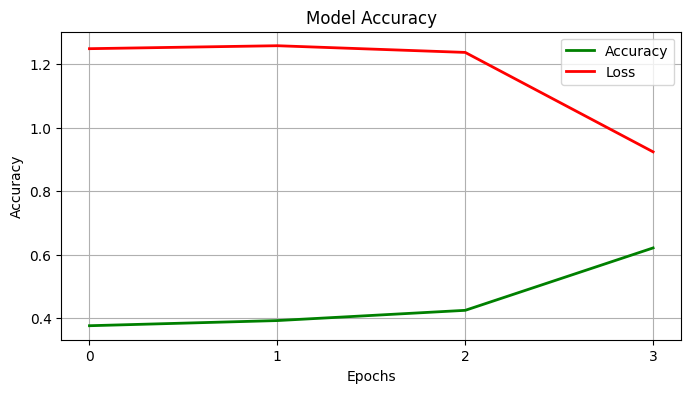

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], 'g-', linewidth=2)
plt.plot(history.history['loss'], 'r-', linewidth=2)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'])
plt.show()

Accuracy on Test data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model



In [ ]:
test_images=open_images(test_path, False) #load and augment test images
test_labels=encode_label(test_label) #encode the test labels
test_predictions=model.predict(test_images) #predict using the trained model


print("classification report:")
print(classification_report(test_labels, np.argmax(test_predictions, axis=1)))
